In [1]:
 # import library 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
#import data
house =pd.read_csv('HousingData.csv')


In [3]:
# view data
house.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [4]:
house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [5]:
col=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV']
house.columns=col

## Exploratory data analysis

In [6]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     486 non-null    float64
 1   ZN       486 non-null    float64
 2   INDUS    486 non-null    float64
 3   CHAS     486 non-null    float64
 4   NX       506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      486 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    486 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(12), int64(2)
memory usage: 55.5 KB


In [7]:
house.describe()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,486.000000,486.000000,486.000000,486.000000,506.000000,506.000000,486.000000,506.000000,506.000000,506.000000,506.000000,506.000000,486.000000,506.000000
mean,3.611874,11.211934,11.083992,0.069959,0.554695,6.284634,68.518519,3.795043,9.549407,408.237154,18.455534,356.674032,12.715432,22.532806
std,8.720192,23.388876,6.835896,0.255340,0.115878,0.702617,27.999513,2.105710,8.707259,168.537116,2.164946,91.294864,7.155871,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.081900,0.000000,5.190000,0.000000,0.449000,5.885500,45.175000,2.100175,4.000000,279.000000,17.400000,375.377500,7.125000,17.025000
50%,0.253715,0.000000,9.690000,0.000000,0.538000,6.208500,76.800000,3.207450,5.000000,330.000000,19.050000,391.440000,11.430000,21.200000
75%,3.560263,12.500000,18.100000,0.000000,0.624000,6.623500,93.975000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## Handling missing values

In [8]:
# check for missing values
house.isna().sum()

CRIM       20
ZN         20
INDUS      20
CHAS       20
NX          0
RM          0
AGE        20
DIS         0
RAD         0
TAX         0
PTRATIO     0
B           0
LSTAT      20
MEDV        0
dtype: int64

In [9]:
house['CRIM']=house['CRIM'].fillna(house['CRIM'].mean())
house['ZN']=house['ZN'].fillna(house['ZN'].mean())
house['INDUS']=house['INDUS'].fillna(house['INDUS'].mean())
house['CHAS']=house['CHAS'].fillna(house['CHAS'].mode()[0])
house['AGE']=house['AGE'].fillna(house['AGE'].mean())
house['LSTAT']=house['LSTAT'].fillna(house['LSTAT'].mean())

In [10]:
house.isna().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NX         0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [11]:
# check for categories
house.nunique()

CRIM       485
ZN          27
INDUS       77
CHAS         2
NX          81
RM         446
AGE        349
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      439
MEDV       229
dtype: int64

In [12]:
## correlation
house.corr()

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.182930,0.391161,-0.053710,0.410377,-0.215434,0.344934,-0.366523,0.608886,0.566528,0.273384,-0.370163,0.434044,-0.379695
ZN,-0.182930,1.000000,-0.513336,-0.034471,-0.502287,0.316550,-0.541274,0.638388,-0.306316,-0.308334,-0.403085,0.167431,-0.407549,0.365943
INDUS,0.391161,-0.513336,1.000000,0.054172,0.740965,-0.381457,0.614592,-0.699639,0.593176,0.716062,0.384806,-0.354597,0.567354,-0.478657
CHAS,-0.053710,-0.034471,0.054172,1.000000,0.070867,0.106797,0.073549,-0.092318,-0.003339,-0.035822,-0.109451,0.050608,-0.047808,0.183844
NX,0.410377,-0.502287,0.740965,0.070867,1.000000,-0.302188,0.711461,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.572379,-0.427321
RM,-0.215434,0.316550,-0.381457,0.106797,-0.302188,1.000000,-0.241351,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.602962,0.695360
AGE,0.344934,-0.541274,0.614592,0.073549,0.711461,-0.241351,1.000000,-0.724353,0.449989,0.500589,0.262723,-0.265282,0.574893,-0.380223
DIS,-0.366523,0.638388,-0.699639,-0.092318,-0.769230,0.205246,-0.724353,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.483429,0.249929
RAD,0.608886,-0.306316,0.593176,-0.003339,0.611441,-0.209847,0.449989,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.468440,-0.381626
TAX,0.566528,-0.308334,0.716062,-0.035822,0.668023,-0.292048,0.500589,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.524545,-0.468536


Text(0, 0.5, 'price')

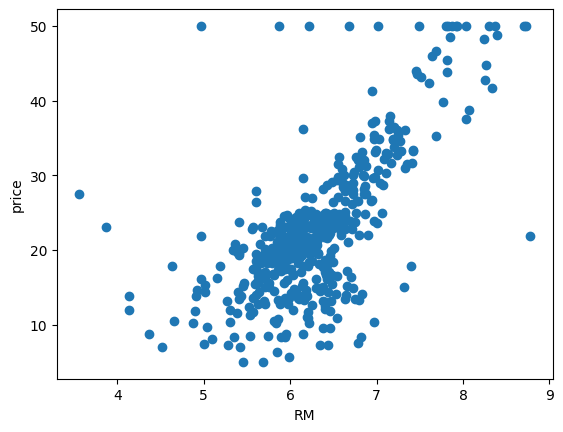

In [13]:
plt.scatter(house['RM'],house['MEDV'])
plt.xlabel('RM')
plt.ylabel('price')

<Axes: xlabel='RAD', ylabel='TAX'>

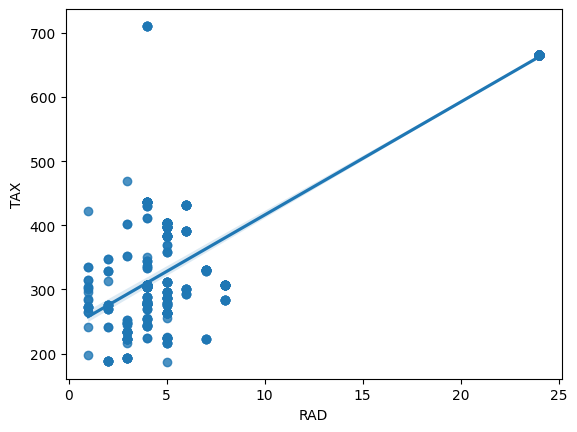

In [14]:
sns.regplot(x='RAD',y='TAX',data=house)

<Axes: xlabel='CHAS', ylabel='MEDV'>

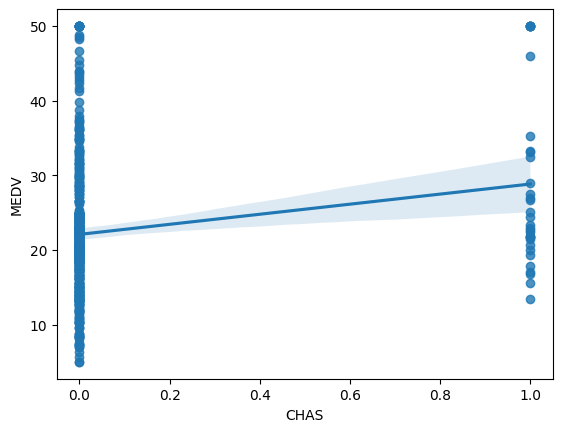

In [15]:
sns.regplot(x='CHAS',y='MEDV',data=house)

e:\End to end projects\End-to-End-House-Price-prediction-ML-project\myenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


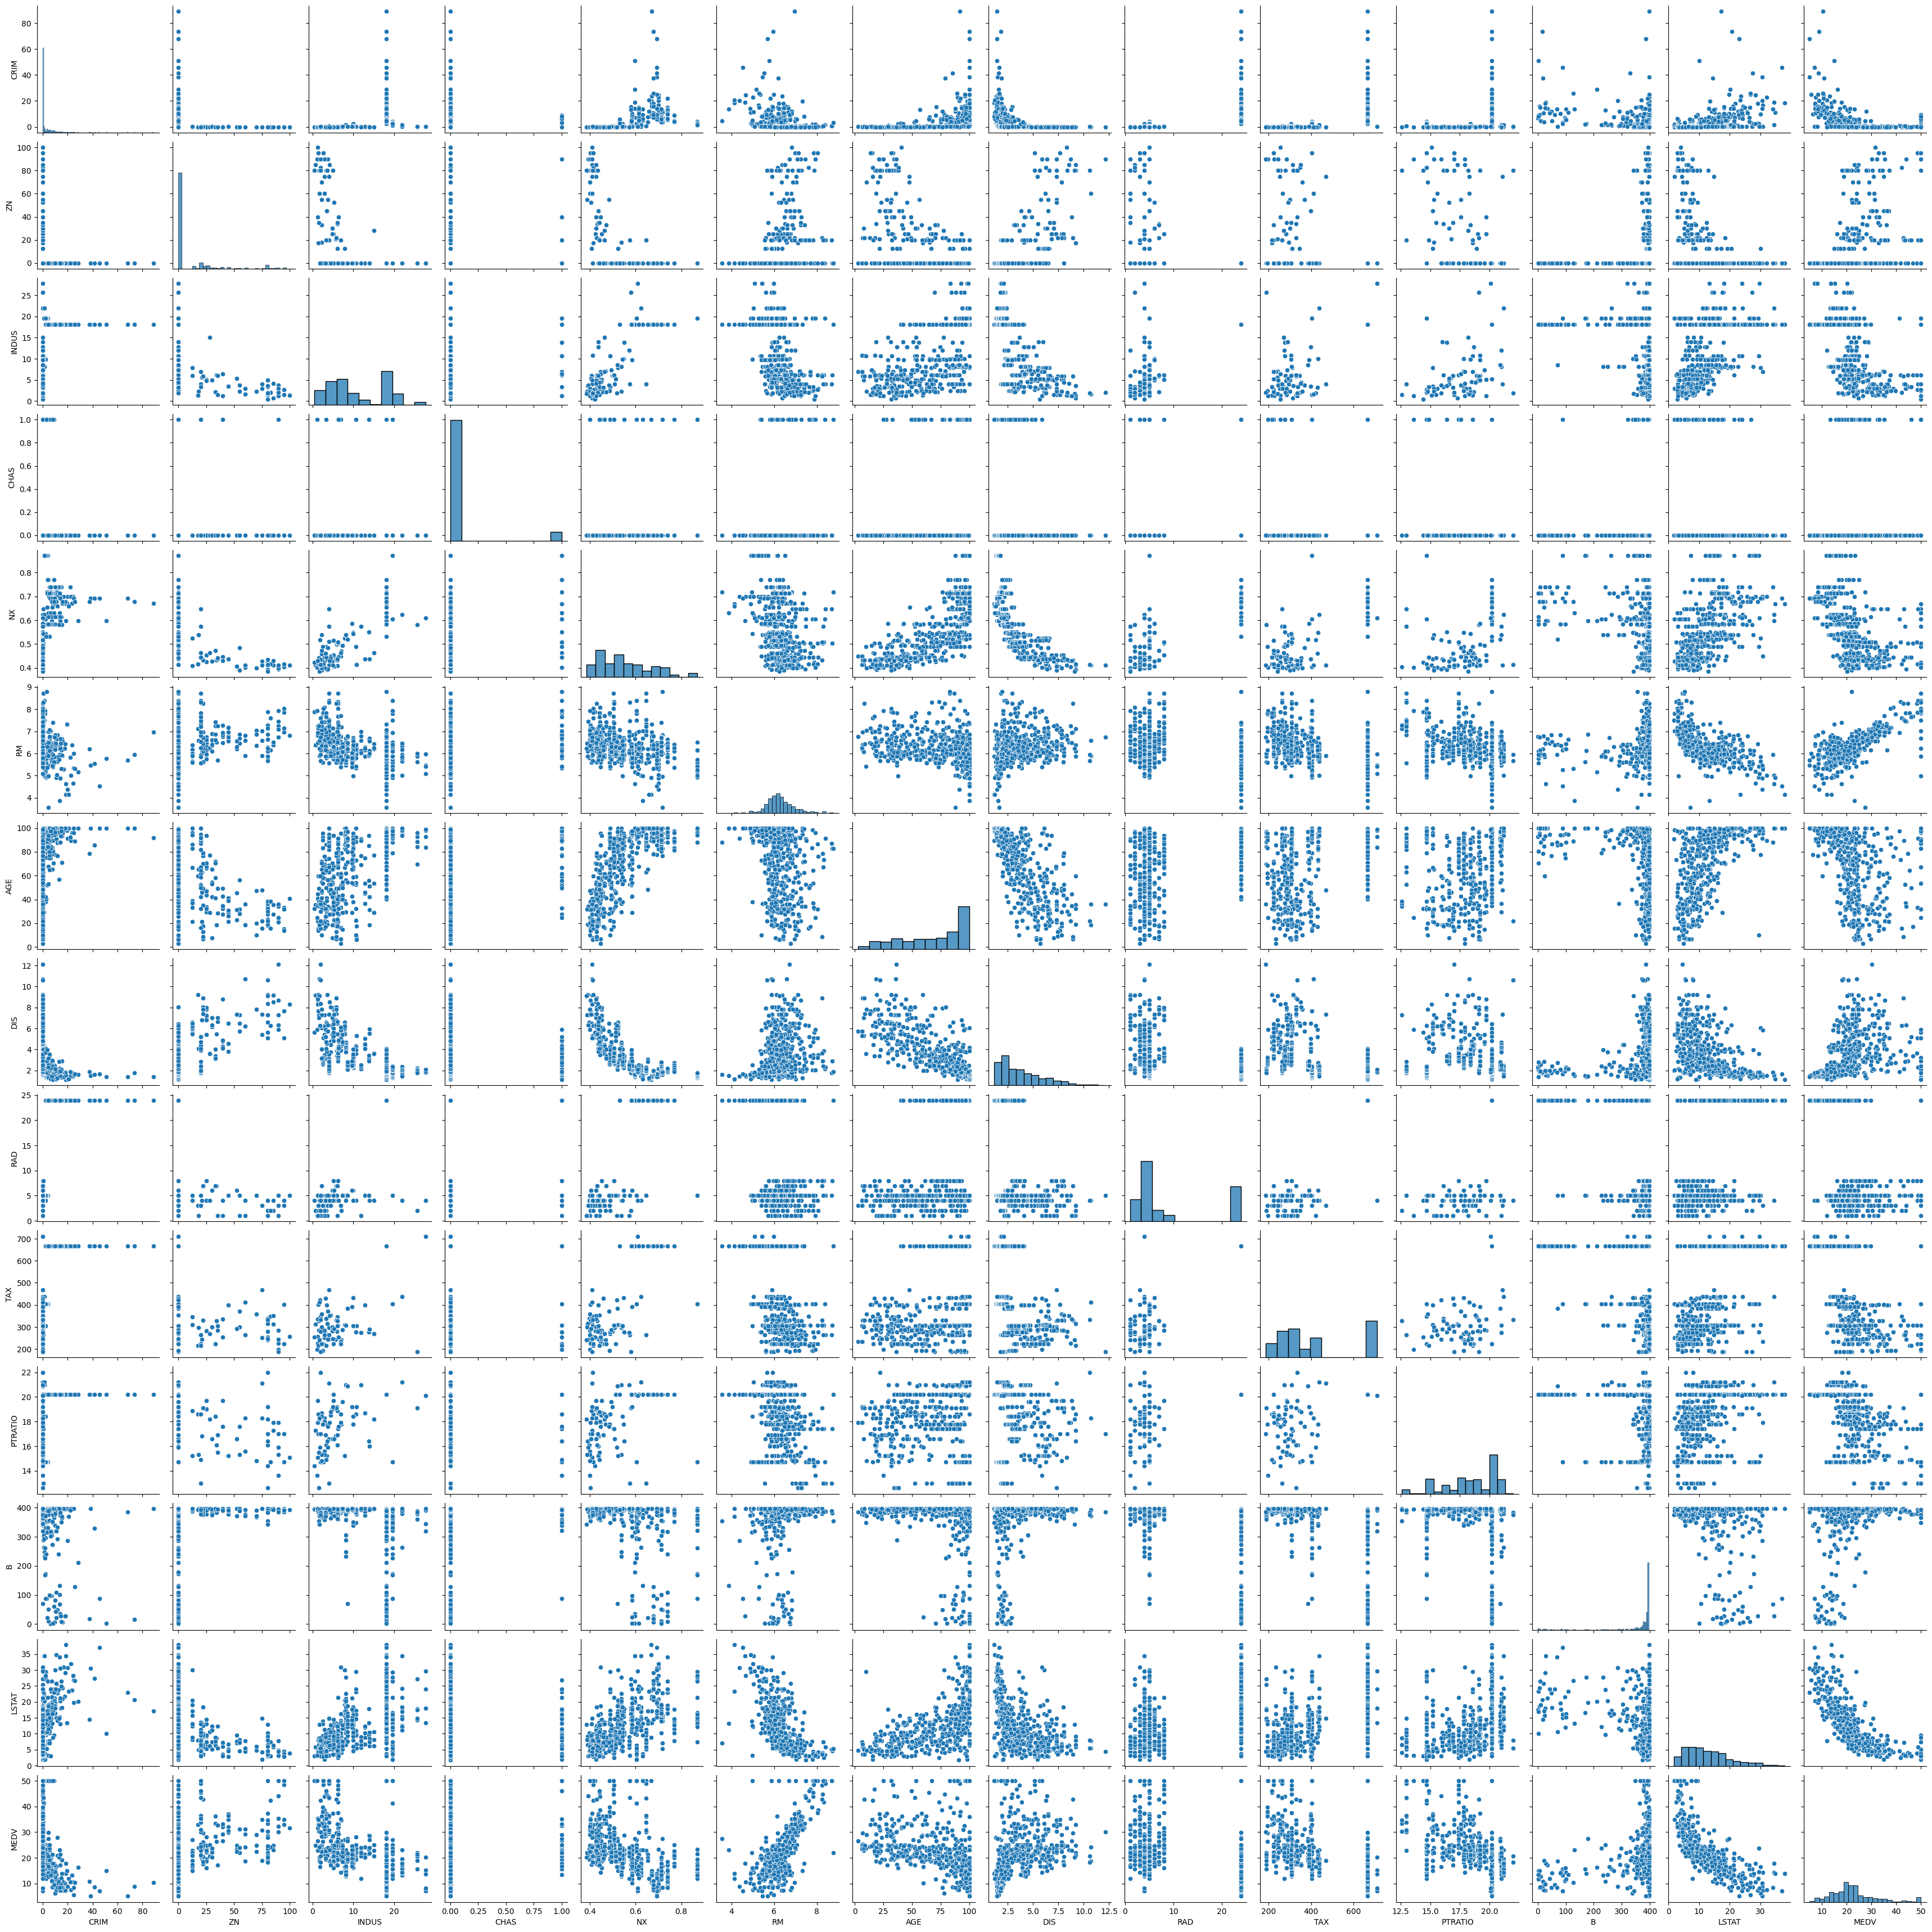

In [14]:
# visualizing pairplot
sns.pairplot(house)

In [16]:
# columns name 
house.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [17]:
# defining independent and dependent features
y=house['MEDV']
X=house.drop(['MEDV'],axis=1)

In [18]:
# spliting of data
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=0)

In [19]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((354, 13), (152, 13), (354,), (152,))

In [20]:
#standardize the dataset
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_train=ss.fit_transform(X_train)
X_test=ss.transform(X_test)

In [21]:
import pickle
pickle.dump(ss,open('scaler.pkl','wb'))

In [22]:
X_train

array([[-0.21032922, -0.49717392,  1.61005067, ...,  1.2272573 ,
         0.42454294,  3.15776572],
       [-0.39259547,  0.36758958, -0.59002424, ...,  0.05696346,
         0.40185312, -0.69463686],
       [-0.33924367, -0.49717392,  1.61005067, ...,  1.2272573 ,
         0.39846135,  0.63810961],
       ...,
       [-0.38821589, -0.49717392, -0.14057826, ..., -0.30312696,
         0.39659002, -0.32354711],
       [-0.37879103, -0.49717392,  0.01768446, ..., -0.25811566,
         0.37588849,  0.90379255],
       [-0.38964124, -0.49717392, -1.01883991, ..., -0.84326258,
         0.42454294,  0.31033773]])

## Model training

In [46]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [47]:
# print the coefficient and intercept
print(regression.coef_)


[-1.04667482  0.85781231 -0.47545904  0.74653713 -1.66399871  2.90014692
 -0.72325207 -3.15297222  1.6664514  -1.40965262 -2.1980236   0.58229648
 -2.945032  ]


In [48]:
print(regression.intercept_)

22.745480225988704


In [49]:
regression.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [50]:
# prediction
reg_pred=regression.predict(X_test)
reg_pred

array([26.33143807, 22.80511055, 29.31185909, 11.50886903, 21.5386293 ,
       19.3992857 , 20.31159344, 21.36199183, 19.40927608, 20.52259387,
        4.87456648, 16.73922319, 16.99841369,  5.21065963, 39.736202  ,
       32.94054992, 21.9570804 , 36.31895763, 31.7531954 , 23.59536646,
       24.94770034, 23.5428027 , 20.98138505, 30.61567685, 22.65049012,
        8.79405157, 17.48751382, 17.97308727, 36.0926423 , 21.06301746,
       17.83191855, 17.43129717, 18.97917427, 23.11003989, 28.97498356,
       19.72267649, 11.2087716 , 24.56313577, 18.3823991 , 15.47504967,
       26.26635086, 21.41642495, 23.77438775, 14.80985878, 23.73865037,
       24.70588648, 19.67740984, 23.4563796 , 10.17949321, 24.63524765,
       22.47506084, 18.89452209, 24.46162627, 30.89916405, 13.07149217,
       22.17255517, 21.11282631, 15.74031658, 13.02132273, 22.88926423,
       17.78419745, 21.85010978, 32.54404215, 31.49694887, 17.58281286,
       33.28010952, 19.3801383 , 19.33772043, 20.55110877, 24.01

## Assumptions

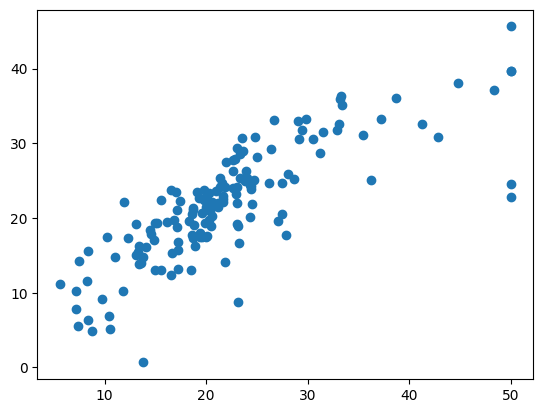

In [51]:
# plot a scatter plot for the prediction 
plt.scatter(y_test,reg_pred)

In [52]:
# error
residuals=y_test-reg_pred
residuals

329    -3.731438
371    27.194889
219    -6.311859
403    -3.208869
78     -0.338629
         ...    
4      11.064475
428    -3.730184
385    -0.588993
308    -5.110984
5       3.472524
Name: MEDV, Length: 152, dtype: float64

e:\End to end projects\End-to-End-House-Price-prediction-ML-project\myenv\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


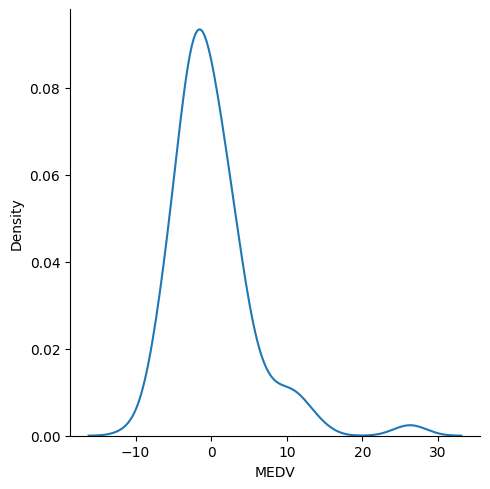

In [53]:
## plot this residuals
sns.displot(residuals,kind='kde')

## Performance

In [68]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,mean_absolute_percentage_error

In [55]:
mean_squared_error(y_test,reg_pred)

28.782799476441596

In [56]:
mean_absolute_error(y_test,reg_pred)

3.7421641967877135

In [57]:
np.sqrt(mean_squared_error(y_test,reg_pred))

5.36496034248545

## New Data Prediction

In [58]:
sample=house.sample()
sample

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
397,7.67202,0.0,18.1,0.0,0.693,5.747,98.9,1.6334,24,666,20.2,393.1,19.92,8.5


In [59]:
sample.shape

(1, 14)

In [60]:
sample.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [61]:
x_new=sample.drop(columns=['MEDV'],axis=1)
x_new

,CRIM,ZN,INDUS,CHAS,NX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
397,7.67202,0.0,18.1,0.0,0.693,5.747,98.9,1.6334,24,666,20.2,393.1,19.92


In [62]:
x_new=ss.fit_transform(x_new)

In [63]:
print(regression.predict(x_new))

[22.74548023]


## Pickling The model file for Deployment

In [64]:
import pickle

In [65]:
pickle.dump(regression,open('regmodel.pkl','wb'))

In [66]:
pickled_model=pickle.load(open('regmodel.pkl','rb'))

In [67]:

pickled_model.predict(X_test)

array([26.33143807, 22.80511055, 29.31185909, 11.50886903, 21.5386293 ,
       19.3992857 , 20.31159344, 21.36199183, 19.40927608, 20.52259387,
        4.87456648, 16.73922319, 16.99841369,  5.21065963, 39.736202  ,
       32.94054992, 21.9570804 , 36.31895763, 31.7531954 , 23.59536646,
       24.94770034, 23.5428027 , 20.98138505, 30.61567685, 22.65049012,
        8.79405157, 17.48751382, 17.97308727, 36.0926423 , 21.06301746,
       17.83191855, 17.43129717, 18.97917427, 23.11003989, 28.97498356,
       19.72267649, 11.2087716 , 24.56313577, 18.3823991 , 15.47504967,
       26.26635086, 21.41642495, 23.77438775, 14.80985878, 23.73865037,
       24.70588648, 19.67740984, 23.4563796 , 10.17949321, 24.63524765,
       22.47506084, 18.89452209, 24.46162627, 30.89916405, 13.07149217,
       22.17255517, 21.11282631, 15.74031658, 13.02132273, 22.88926423,
       17.78419745, 21.85010978, 32.54404215, 31.49694887, 17.58281286,
       33.28010952, 19.3801383 , 19.33772043, 20.55110877, 24.01